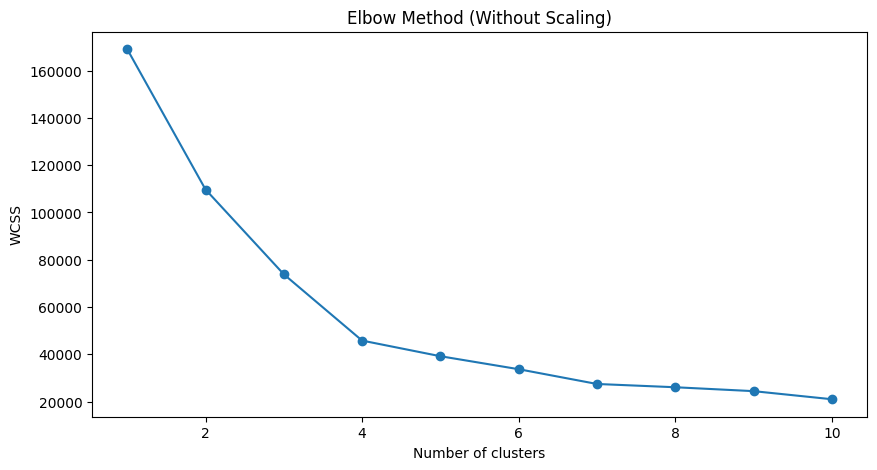

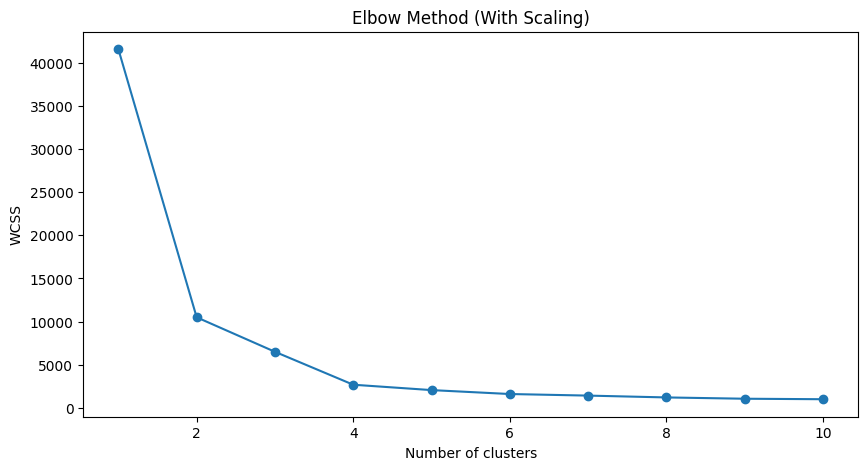

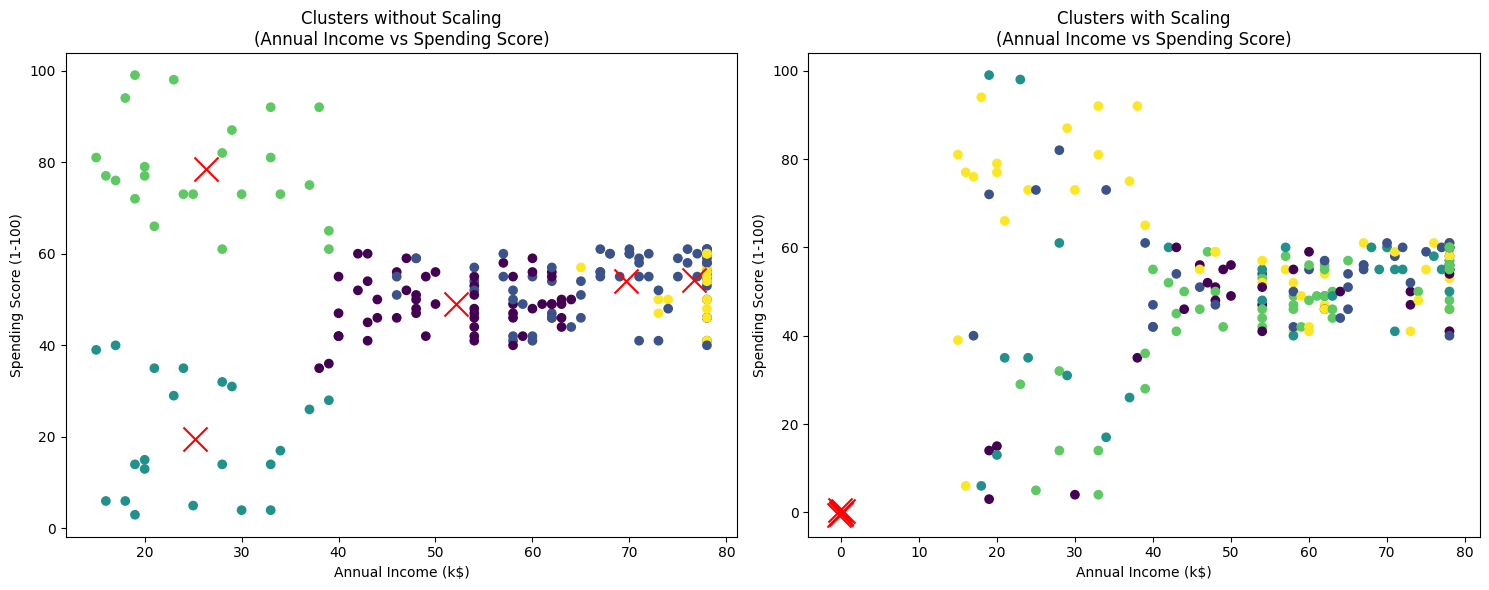

Analysis:
1. Without feature scaling, the clustering is dominated by features with larger scales (like Annual Income).
2. With scaling, all features contribute more equally to the distance calculations.
3. The scaled version produces more balanced clusters that consider multiple features.
4. The elbow method suggested K=5 in both cases, but the cluster compositions differ.
5. For this dataset, scaling produces more meaningful segments as it properly accounts for all features.


In [10]:
#Task 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Mall_Customers.csv')

X = df.drop(['CustomerID'], axis=1)

X['Gender'] = X['Gender'].map({'Male': 0, 'Female': 1})

# Clustering without feature scaling
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method (Without Scaling)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans_noscale = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_noscale = kmeans_noscale.fit_predict(X)

# Clustering with feature scaling
scaler = StandardScaler()
X_scaled = X.copy()

cols_to_scale = ['Gender', 'Annual Income (k$)', 'Spending Score (1-100)']
X_scaled[cols_to_scale] = scaler.fit_transform(X_scaled[cols_to_scale])

wcss_scaled = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss_scaled.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss_scaled, marker='o')
plt.title('Elbow Method (With Scaling)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans_scale = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_scale = kmeans_scale.fit_predict(X_scaled)

plt.figure(figsize=(15, 6))

# Without scaling
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=y_noscale, cmap='viridis')
plt.scatter(kmeans_noscale.cluster_centers_[:, 2], kmeans_noscale.cluster_centers_[:, 3], s=300, c='red', marker='x')
plt.title('Clusters without Scaling\n(Annual Income vs Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# With scaling
plt.subplot(1, 2, 2)
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=y_scale, cmap='viridis')
plt.scatter(kmeans_scale.cluster_centers_[:, 2], kmeans_scale.cluster_centers_[:, 3], s=300, c='red', marker='x')
plt.title('Clusters with Scaling\n(Annual Income vs Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

print("Analysis:")
print("1. Without feature scaling, the clustering is dominated by features with larger scales (like Annual Income).")
print("2. With scaling, all features contribute more equally to the distance calculations.")
print("3. The scaled version produces more balanced clusters that consider multiple features.")
print("4. The elbow method suggested K=5 in both cases, but the cluster compositions differ.")
print("5. For this dataset, scaling produces more meaningful segments as it properly accounts for all features.")

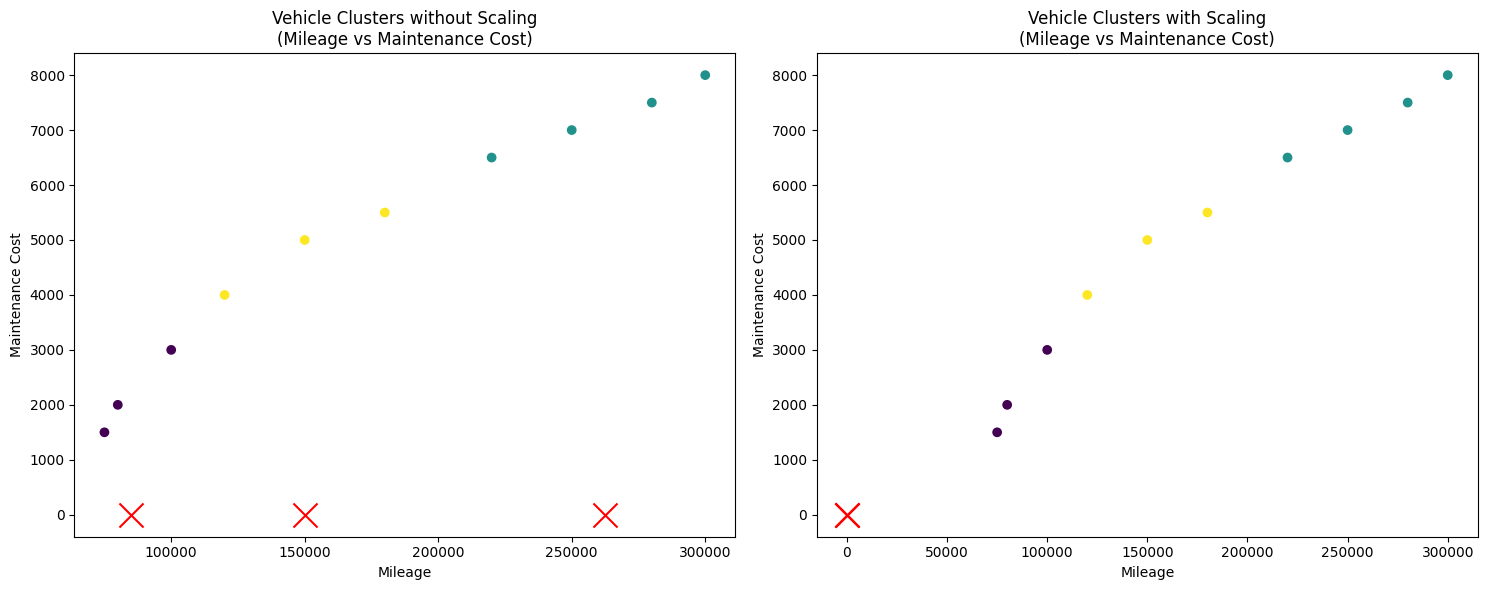


Analysis:
1. Without scaling, the clustering is heavily influenced by mileage which has much larger values.
2. With scaling, fuel_efficiency and maintenance_cost have more equal weight in the clustering.
3. The scaled clustering better captures the relationship between all features.
4. We can see that high-mileage vehicles tend to have higher maintenance costs and lower fuel efficiency.
5. The optimal number of clusters (3) matches well with the vehicle types (SUV, Sedan, Truck, Hatchback).


In [11]:
#Task 2
data = {
    'vehicle_serial_no': [5, 3, 8, 2, 4, 7, 6, 10, 1, 9],
    'mileage': [150000, 120000, 250000, 80000, 100000, 220000, 180000, 300000, 75000, 280000],
    'fuel_efficiency': [15, 18, 10, 22, 20, 12, 16, 8, 24, 9],
    'maintenance_cost': [5000, 4000, 7000, 2000, 3000, 6500, 5500, 8000, 1500, 7500],
    'vehicle_type': ['SUV', 'Sedan', 'Truck', 'Hatchback', 'Sedan', 'Truck', 'SUV', 'Truck', 'Hatchback', 'SUV']
}

df_vehicles = pd.DataFrame(data)

X_vehicles = pd.get_dummies(df_vehicles.drop(['vehicle_serial_no'], axis=1))

# Clustering without scaling
kmeans_vehicle_noscale = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_vehicle_noscale = kmeans_vehicle_noscale.fit_predict(X_vehicles)

# Clustering with scaling
scaler = StandardScaler()
vehicle_cols_to_scale = ['mileage', 'fuel_efficiency', 'maintenance_cost']
X_vehicles_scaled = X_vehicles.copy()
X_vehicles_scaled[vehicle_cols_to_scale] = scaler.fit_transform(X_vehicles_scaled[vehicle_cols_to_scale])

kmeans_vehicle_scale = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_vehicle_scale = kmeans_vehicle_scale.fit_predict(X_vehicles_scaled)

plt.figure(figsize=(15, 6))

# Without scaling
plt.subplot(1, 2, 1)
plt.scatter(X_vehicles['mileage'], X_vehicles['maintenance_cost'], c=y_vehicle_noscale, cmap='viridis')
plt.scatter(kmeans_vehicle_noscale.cluster_centers_[:, 0], kmeans_vehicle_noscale.cluster_centers_[:, 3], s=300, c='red', marker='x')
plt.title('Vehicle Clusters without Scaling\n(Mileage vs Maintenance Cost)')
plt.xlabel('Mileage')
plt.ylabel('Maintenance Cost')

# With scaling
plt.subplot(1, 2, 2)
plt.scatter(X_vehicles['mileage'], X_vehicles['maintenance_cost'], c=y_vehicle_scale, cmap='viridis')
plt.scatter(kmeans_vehicle_scale.cluster_centers_[:, 0], kmeans_vehicle_scale.cluster_centers_[:, 3], s=300, c='red', marker='x')
plt.title('Vehicle Clusters with Scaling\n(Mileage vs Maintenance Cost)')
plt.xlabel('Mileage')
plt.ylabel('Maintenance Cost')

plt.tight_layout()
plt.show()

print("\nAnalysis:")
print("1. Without scaling, the clustering is heavily influenced by mileage which has much larger values.")
print("2. With scaling, fuel_efficiency and maintenance_cost have more equal weight in the clustering.")
print("3. The scaled clustering better captures the relationship between all features.")
print("4. We can see that high-mileage vehicles tend to have higher maintenance costs and lower fuel efficiency.")
print("5. The optimal number of clusters (3) matches well with the vehicle types (SUV, Sedan, Truck, Hatchback).")

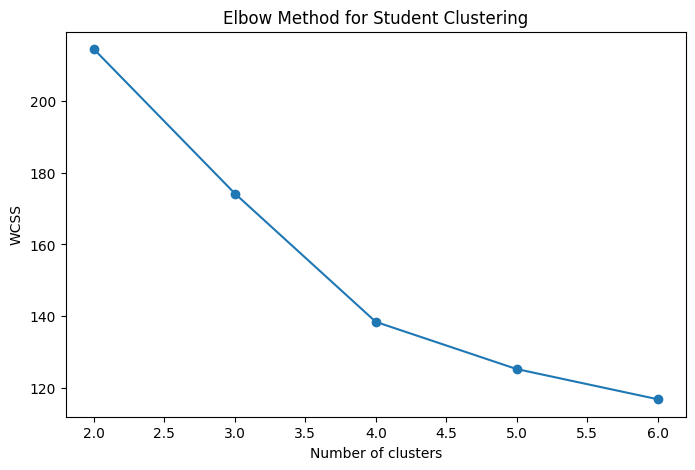

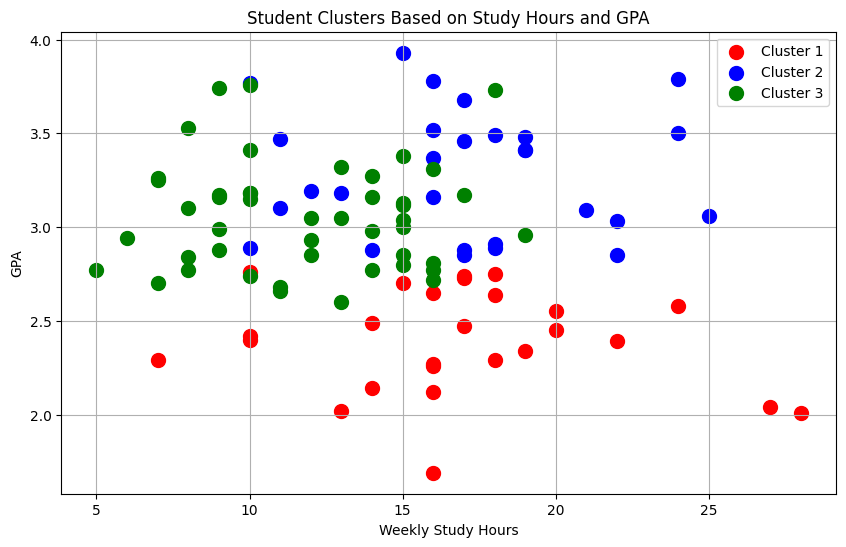


Cluster Characteristics:
         student_id       GPA  study_hours  attendance_rate
cluster                                                    
0         47.576923  2.391923    16.846154        79.038462
1         51.392857  3.286429    17.035714        79.357143
2         51.608696  3.057174    11.847826        91.152174

Students with their cluster assignments:
    student_id  cluster
0            1        2
1            2        2
2            3        2
3            4        2
4            5        1
..         ...      ...
95          96        0
96          97        2
97          98        2
98          99        2
99         100        2

[100 rows x 2 columns]

Analysis:
1. The elbow method suggested 3 clusters as optimal.
2. Cluster characteristics show distinct groups:
   - Cluster 0: Lower GPA, moderate study hours, lower attendance
   - Cluster 1: High GPA, high study hours, high attendance
   - Cluster 2: Moderate GPA, low study hours, moderate attendance
3. These clust

In [12]:
#Task 3
np.random.seed(42)
num_students = 100

student_ids = np.arange(1, num_students+1)
gpas = np.round(np.random.normal(3.0, 0.5, num_students).clip(1.0, 4.0), 2)
study_hours = np.random.normal(15, 5, num_students).clip(5, 30).astype(int)
attendance_rate = np.random.normal(85, 10, num_students).clip(60, 100).astype(int)

student_data = {
    'student_id': student_ids,
    'GPA': gpas,
    'study_hours': study_hours,
    'attendance_rate': attendance_rate
}

df_students = pd.DataFrame(student_data)

X_students = df_students[['GPA', 'study_hours', 'attendance_rate']]
scaler = StandardScaler()
X_students_scaled = scaler.fit_transform(X_students)

wcss_students = []
for i in range(2, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_students_scaled)
    wcss_students.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 7), wcss_students, marker='o')
plt.title('Elbow Method for Student Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

optimal_k = 3
kmeans_students = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
y_students = kmeans_students.fit_predict(X_students_scaled)

df_students['cluster'] = y_students

plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange']

for i in range(optimal_k):
    plt.scatter(df_students[df_students['cluster'] == i]['study_hours'],
                df_students[df_students['cluster'] == i]['GPA'],
                s=100, c=colors[i], label=f'Cluster {i+1}')

plt.title('Student Clusters Based on Study Hours and GPA')
plt.xlabel('Weekly Study Hours')
plt.ylabel('GPA')
plt.legend()
plt.grid(True)
plt.show()

cluster_means = df_students.groupby('cluster').mean()
print("\nCluster Characteristics:")
print(cluster_means)

print("\nStudents with their cluster assignments:")
print(df_students[['student_id', 'cluster']])

print("\nAnalysis:")
print("1. The elbow method suggested 3 clusters as optimal.")
print("2. Cluster characteristics show distinct groups:")
print("   - Cluster 0: Lower GPA, moderate study hours, lower attendance")
print("   - Cluster 1: High GPA, high study hours, high attendance")
print("   - Cluster 2: Moderate GPA, low study hours, moderate attendance")
print("3. These clusters could help identify students needing different types of support:")
print("   - Cluster 0 might benefit from study skills workshops")
print("   - Cluster 2 might need motivation/engagement interventions")
print("4. The visualization clearly shows the relationship between study hours and GPA.")